In [1]:
import os
import sys

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import random

import numpy as np
import torch

from SGLD_v7 import SgldBayesianRegression as V7
from models.linear import LinearRegression
from utils import generate_linear_data, plot_mse, plot_sigma_squared

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
in_feature = 50


In [2]:
# Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n=1000, in_features=in_feature, noise_std=1.0)

a_beta = 2.0
b_beta = 1.0
out_feature = 1
model=LinearRegression(in_features=in_feature, out_features=out_feature, a_beta=a_beta, b_beta=b_beta)

In [3]:
# Run SGLD
c = V7(
    model=model,
    step_size=0.01,
    num_epochs=300,
    burn_in_epochs=250,
    batch_size=100,
)

In [4]:
c.train(X, y)

Epoch 1/300
Epoch 101/300
Epoch 201/300


In [5]:
inputs = torch.ones(in_feature)
print(f'true_weight={true_weights} true_bias={true_bias}')
print(f'X={inputs} Y(predicted)={c.predict(inputs)} Y(expected)={sum(true_weights) + true_bias}')

true_weight=tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50.]) true_bias=-1.0
predict (sample_avg)::variance_prediction=[102.91006]
X=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]) Y(predicted)=tensor([1215.3258]) Y(expected)=1274.0


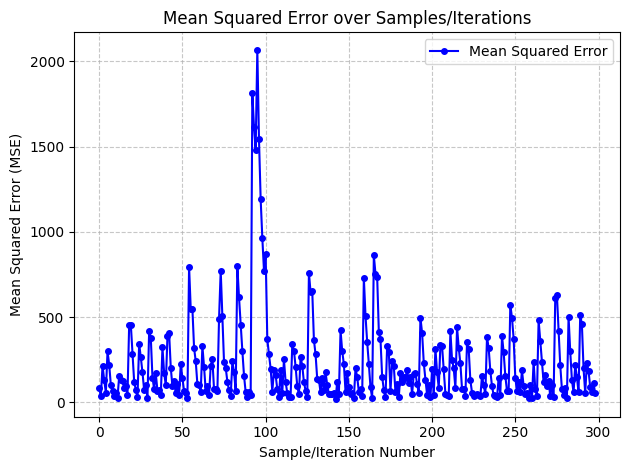

In [14]:
plot_mse(c, 2700, -1)

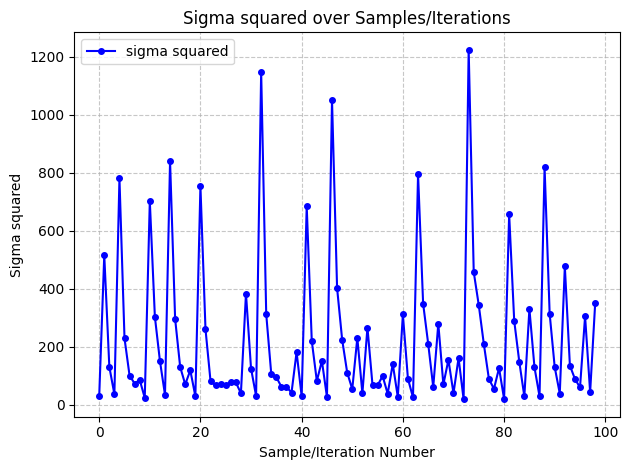

In [15]:
plot_sigma_squared(c, -100, -1)